In [47]:
# #!/usr/bin/env python
# # -*- encoding: utf-8 -*-
# '''
# @Manuscript  : Integrated Proteogenomic Characterization of Cholangiocarcinoma
# @File     : load_directory_structure.py
# @Time     : 2022/03/11 16:32:19
# @Author   : RanPeng 
# @Version  : python 3.8.6 
# @Contact  : 2502388440@hotmail.com 
# @License  : (C)Copyright 2021-2022, DingLab-CHINA-SHANGHAI 
# @Description : Exploratory analysis of clinical data 
# '''

In [2]:
import pandas as pd
import numpy as np
from load_directory_structure import get_directory_structure
from utils import paste0
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
%load_ext autoreload
%autoreload 2

In [53]:
# change the contents of variable baseDir to the root analysis folder 
baseDir = "/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/"
outputDir, outTableDir, suppTableDir, resourcesDir, dataDir = get_directory_structure(baseDir)

The outputDir already exists: /Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/figure_subpanels/ 
The outTableDir already exists: /Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/output_tables/ 
The suppTableDir already exists: /Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/supplementary_tables/ 
The resourcesDir already exists: /Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/resources/ 
The dataDir already exists: /Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/ 


## load clinical metadata

In [109]:
# load clinical metadata (Supplementary Table 1)
metadata  = pd.read_excel(paste0(suppTableDir,"Supplementary_Table1.xlsx"), sheet_name = '1. Clinical_information', index_col=0)
metadata
# metadata.to_excel(paste0(outTableDir,"1_Clinical_information.xlsx"))

## Classify continuous and discrete variables

In [55]:
from EDA import split_data_dtypes, split_numerical_serial_fea
# excluded_columns = ['Date of surgery', 'Anatomical classification', 'Adjacent tissue (NAT) WES ID', 'Adjacent tissue (NAT) RNA-seq ID', 'T', 'N', 'M']
excluded_columns = ['Date of surgery', 'Anatomical classification', 'Adjacent tissue (NAT) WES ID', 'Adjacent tissue (NAT) RNA-seq ID', 'T', 'N', 'M']
metadata_excluded = metadata.drop(excluded_columns, axis = 1)
metadata_excluded.head()
numerical_columns, category_columns = split_numerical_serial_fea(metadata_excluded, metadata_excluded.columns)

The numerical serial features in the dataset are: 
['Age', 'Overall survival(month)', 'Overall survival(day)', 'Tumor (T) WES ID', 'Tumor (T) RNA-seq ID', 'Tumor (T) proteomic ID', 'Adjacent tissue (NAT) proteomic ID', 'Tumor (T) phosphoproteomic ID', 'Adjacent tissue (NAT) phosphoproteomic ID', 'Tumor size (cm)', 'Preoperative AFP（ng/mL）', 'Preoperative CA19-9（U/ml）', 'Preoperative CEA（ng/ml）', 'ALB, albumin, (g/L)', 'TB, total bilirubin (µmol/L)', 'ALT, aminoleucine transferase (U/L)', 'γ-GT, γ-glutamyltransferase (U/L)', '\nAST/GOT,Aspartate aminotransferase\n（U/L）', 'TBA, total bile acid (µmol/L)', '\nPLT, platelet counts\n(10^9/L)', 'PT, prothrombin time (s) ', 'Absolute tumor cellularity', 'Histology tumor cellularity'].

The category variables features in dataset are: 
['Gender', 'Survival(1,dead;0,alive)', 'Histology', 'iCCA classification', 'HBV infection status', 'HBsAg', 'HBcAb', 'Cholelithiasis', 'Jaundice', 'Type II diabetes', 'Hypertension', 'Presence of fluke infection',

In [56]:
metadata_excluded_numerical = metadata_excluded[numerical_columns]
metadata_excluded_category = metadata_excluded[category_columns]

In [57]:
metadata_excluded_numerical.to_excel(paste0(outTableDir,"metadata_excluded_numerical.xlsx"))
metadata_excluded_numerical

,Age,Overall survival(month),Overall survival(day),Tumor (T) WES ID,Tumor (T) RNA-seq ID,Tumor (T) proteomic ID,Adjacent tissue (NAT) proteomic ID,Tumor (T) phosphoproteomic ID,Adjacent tissue (NAT) phosphoproteomic ID,Tumor size (cm),...,"ALB, albumin, (g/L)","TB, total bilirubin (µmol/L)","ALT, aminoleucine transferase (U/L)","γ-GT, γ-glutamyltransferase (U/L)","\nAST/GOT,Aspartate aminotransferase\n（U/L）","TBA, total bile acid (µmol/L)","\nPLT, platelet counts\n(10^9/L)","PT, prothrombin time (s)",Absolute tumor cellularity,Histology tumor cellularity
Patient No.,,,,,,,,,,,,,,,,,,,,,
CCA#1,53,44.666667,1340.0,NaN,NaN,60477,60478.0,CCA_402,CCA_180,4,...,30,61.2,339,407,487,59.8,Unknown,15.2,NaN,NaN
CCA#2,74,40.533333,1216.0,NaN,R21026827_F20_35_253,60479,60480.0,CCA_81458,CCA_224,3.5,...,41,82.9,53,176,62,16.8,315,11.3,NaN,NaN
CCA#3,59,44.600000,1338.0,CCAT132,NaN,60481,60484.0,CCA_228,CCA_229,3,...,35,153.5,54,230,54,Unknown,267,11.9,0.71,0.69
CCA#4,71,14.566667,437.0,NaN,R21026825_F20_33_251,68986,68987.0,CCA_181,CCA_182,1.8,...,35,242,122,61,Unknown,Unknown,256,10.6,NaN,NaN
CCA#5,60,29.066667,872.0,NaN,NaN,68988,68989.0,CCA_184,CCA_185,2,...,27,54.7,466,349,258,10.5,354,15.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCA#213,75,17.766667,533.0,NaN,NaN,71303,NaN,NaN,NaN,3,...,Unknown,128.8,46,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN
CCA#214,47,17.433333,523.0,NaN,NaN,71311,NaN,CCA_27,NaN,5,...,46,Unknown,53,84,Unknown,Unknown,179,12.9,NaN,NaN
CCA#215,62,10.033333,301.0,CCAT219,NaN,71314,71315.0,CCA_396,CCA_397,2,...,Unknown,282.2,52,135,Unknown,336.9,Unknown,NaN,0.70,0.67


In [58]:
metadata_excluded_category.to_excel(paste0(outTableDir,"metadata_excluded_category.xlsx"))
metadata_excluded_category

,Gender,"Survival(1,dead;0,alive)",Histology,iCCA classification,HBV infection status,HBsAg,HBcAb,Cholelithiasis,Jaundice,Type II diabetes,Hypertension,Presence of fluke infection,Perineural invasion (PNI),Lymphovascular invasion (LVI),eccStage,iccStage,Grade,Proteome subtype,Phosphoproteome cluster,Immune cluster
Patient No.,,,,,,,,,,,,,,,,,,,,
CCA#1,Male,1.0,eCCA,NaN,Positive,Negative,Positive,No,No,No,Yes,No,Yes,Yes,IIIA,NaN,G2_3,S-III,1.0,NaN
CCA#2,Female,1.0,eCCA,NaN,Positive,Negative,Positive,No,No,No,No,No,No,Yes,IIIB,NaN,G2,S-III,2.0,Cluster_6
CCA#3,Male,1.0,eCCA,NaN,Positive,Negative,Positive,No,Yes,No,No,No,Yes,No,IIIC,NaN,G2_3,S-III,1.0,Cluster_6
CCA#4,Female,1.0,eCCA,NaN,Positive,Negative,Positive,Yes,Yes,No,No,No,Yes,No,IIIC,NaN,G2,S-III,2.0,NaN
CCA#5,Male,1.0,eCCA,NaN,Negative,Negative,Unknown,No,Yes,No,No,No,Yes,Unknown,II,NaN,G2_3,S-II,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCA#213,Male,1.0,eCCA,NaN,Negative,Negative,Negative,No,No,No,Yes,No,Yes,No,I,NaN,G2,S-III,NaN,NaN
CCA#214,Male,1.0,eCCA,NaN,Positive,Positive,Positive,No,No,No,No,No,Yes,No,IIIC,NaN,G2_3,S-III,2.0,NaN
CCA#215,Female,1.0,eCCA,NaN,Unknown,Unknown,Unknown,No,No,No,No,No,Yes,No,IIIA,NaN,G2,S-III,2.0,Cluster_6


## Clean the clinical data

### 1、clean the category clincial data

In [59]:
print(f"The eccStage unique is: {metadata_excluded_category['eccStage'].unique()})")
print(f"The iccStage unique is: {metadata_excluded_category['iccStage'].unique()})")
print(f"The Grade unique is: {metadata_excluded_category['Grade'].unique()})")

The eccStage unique is: ['IIIA' 'IIIB' 'IIIC' 'II' 'I' 'IVB' nan])
The iccStage unique is: [nan 'IIIB' 'II' 'IA' 'IB' 'IIIA' 'IV'])
The Grade unique is: ['G2_3' 'G2' 'GX' 'G1_2' 'G1' 'G3'])


In [114]:
category_dic = {"Male":1, "Female":0, 
                "iCCA":1, "eCCA":0,
                "Positive":1, "Negative":0, "Unknown":np.nan,
                "Yes":1, "No":0,
                "Yes":1, "No":0,
                "large iBD":1, "small iBD":0,
                "I":1, "IA":1, "IB":1,"II":2, "IIIA":3, "IIIB":3, "IIIC":3, "IV":4, "IVB":4,
                "G1":1, "G1_2":2, "G2":2,"G2_3":3, "G3":3, "GX":np.nan,
                "S-I":1, "S-II":2, "S-III":3,
                "Cluster_1":1, "Cluster_2":2, "Cluster_3":3,"Cluster_4":4, "Cluster_5":5, "Cluster_6":6}

In [115]:
metadata_excluded_category_washed = metadata_excluded_category.replace(category_dic)
metadata_excluded_category_washed.to_excel(paste0(outTableDir,"metadata_excluded_category_washed.xlsx"))

### 2、clean the numerical clincial data

In [116]:
multiomics_profiling_index = [
    'Tumor (T) WES ID', 'Tumor (T) RNA-seq ID', 
    'Tumor (T) proteomic ID', 'Adjacent tissue (NAT) proteomic ID',
    'Tumor (T) phosphoproteomic ID', 'Adjacent tissue (NAT) phosphoproteomic ID']


multiomics_profiling_index = metadata_excluded_numerical[multiomics_profiling_index]
numerical_columns_select = [i for i in metadata_excluded_numerical.columns if i not in multiomics_profiling_index]
numerical_clinical_feature = metadata_excluded_numerical[numerical_columns_select]
# multiomics_profiling_clinical = multiomics_profiling_index.append(multiomics_profiling_clinical)
numerical_clinical_feature


,Age,Overall survival(month),Overall survival(day),Tumor size (cm),Preoperative AFP（ng/mL）,Preoperative CA19-9（U/ml）,Preoperative CEA（ng/ml）,"ALB, albumin, (g/L)","TB, total bilirubin (µmol/L)","ALT, aminoleucine transferase (U/L)","γ-GT, γ-glutamyltransferase (U/L)","\nAST/GOT,Aspartate aminotransferase\n（U/L）","TBA, total bile acid (µmol/L)","\nPLT, platelet counts\n(10^9/L)","PT, prothrombin time (s)",Absolute tumor cellularity,Histology tumor cellularity
Patient No.,,,,,,,,,,,,,,,,,
CCA#1,53,44.666667,1340.0,4,5.6,32.3,2.6,30,61.2,339,407,487,59.8,Unknown,15.2,NaN,NaN
CCA#2,74,40.533333,1216.0,3.5,1.6,10.7,2.42,41,82.9,53,176,62,16.8,315,11.3,NaN,NaN
CCA#3,59,44.600000,1338.0,3,2.8,25.7,3.38,35,153.5,54,230,54,Unknown,267,11.9,0.71,0.69
CCA#4,71,14.566667,437.0,1.8,2.5,297.4,1.17,35,242,122,61,Unknown,Unknown,256,10.6,NaN,NaN
CCA#5,60,29.066667,872.0,2,4.5,311.2,4.3,27,54.7,466,349,258,10.5,354,15.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCA#213,75,17.766667,533.0,3,Unknown,Unknown,Unknown,Unknown,128.8,46,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN
CCA#214,47,17.433333,523.0,5,5.7,151.5,5.3,46,Unknown,53,84,Unknown,Unknown,179,12.9,NaN,NaN
CCA#215,62,10.033333,301.0,2,9.8,1140,5.8,Unknown,282.2,52,135,Unknown,336.9,Unknown,NaN,0.70,0.67


In [117]:
numerical_clinical_feature.replace('>', '', regex=True, inplace=True)
numerical_clinical_feature.replace('<', '', regex=True, inplace=True)
numerical_clinical_feature.replace('Unknown', np.nan, inplace=True)

/Users/ranpeng/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [118]:
numerical_clinical_feature.dtypes

Age                                              int64
Overall survival(month)                        float64
Overall survival(day)                          float64
Tumor size (cm)                                float64
Preoperative AFP（ng/mL）                         object
Preoperative CA19-9（U/ml）                       object
Preoperative CEA（ng/ml）                        float64
ALB, albumin, (g/L)                            float64
TB, total bilirubin (µmol/L)                   float64
ALT, aminoleucine transferase (U/L)            float64
γ-GT, γ-glutamyltransferase (U/L)              float64
\nAST/GOT,Aspartate aminotransferase\n（U/L）    float64
TBA, total bile acid (µmol/L)                   object
\nPLT, platelet counts\n(10^9/L)               float64
PT, prothrombin time (s)                       float64
Absolute tumor cellularity                     float64
Histology tumor cellularity                    float64
dtype: object

In [119]:
numerical_clinical_feature['Preoperative AFP（ng/mL）'] = numerical_clinical_feature['Preoperative AFP（ng/mL）'].astype('float64')
numerical_clinical_feature['Preoperative CA19-9（U/ml）'] = numerical_clinical_feature['Preoperative CA19-9（U/ml）'].astype('float64')
numerical_clinical_feature['TBA, total bile acid (µmol/L)'] = numerical_clinical_feature['TBA, total bile acid (µmol/L)'].astype('float64')


<ipython-input-119-771d5bd55b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_clinical_feature['Preoperative AFP（ng/mL）'] = numerical_clinical_feature['Preoperative AFP（ng/mL）'].astype('float64')
<ipython-input-119-771d5bd55b56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_clinical_feature['Preoperative CA19-9（U/ml）'] = numerical_clinical_feature['Preoperative CA19-9（U/ml）'].astype('float64')
<ipython-input-119-771d5bd55b56>:3: SettingWithCopyWarning: 
A value is trying to be set

In [120]:
numerical_clinical_feature.to_excel(paste0(outTableDir,"numerical_clinical_feature_washed.xlsx"))

In [121]:
numerical_clinical_feature_washed = pd.concat([multiomics_profiling_index, numerical_clinical_feature], axis=1)
numerical_clinical_feature_washed.to_excel(paste0(outTableDir,"numerical_clinical_feature_washed1.xlsx"))
numerical_clinical_feature_washed

,Tumor (T) WES ID,Tumor (T) RNA-seq ID,Tumor (T) proteomic ID,Adjacent tissue (NAT) proteomic ID,Tumor (T) phosphoproteomic ID,Adjacent tissue (NAT) phosphoproteomic ID,Age,Overall survival(month),Overall survival(day),Tumor size (cm),...,"ALB, albumin, (g/L)","TB, total bilirubin (µmol/L)","ALT, aminoleucine transferase (U/L)","γ-GT, γ-glutamyltransferase (U/L)","\nAST/GOT,Aspartate aminotransferase\n（U/L）","TBA, total bile acid (µmol/L)","\nPLT, platelet counts\n(10^9/L)","PT, prothrombin time (s)",Absolute tumor cellularity,Histology tumor cellularity
Patient No.,,,,,,,,,,,,,,,,,,,,,
CCA#1,NaN,NaN,60477,60478.0,CCA_402,CCA_180,53,44.666667,1340.0,4.0,...,30.0,61.2,339.0,407.0,487.0,59.8,NaN,15.2,NaN,NaN
CCA#2,NaN,R21026827_F20_35_253,60479,60480.0,CCA_81458,CCA_224,74,40.533333,1216.0,3.5,...,41.0,82.9,53.0,176.0,62.0,16.8,315.0,11.3,NaN,NaN
CCA#3,CCAT132,NaN,60481,60484.0,CCA_228,CCA_229,59,44.600000,1338.0,3.0,...,35.0,153.5,54.0,230.0,54.0,NaN,267.0,11.9,0.71,0.69
CCA#4,NaN,R21026825_F20_33_251,68986,68987.0,CCA_181,CCA_182,71,14.566667,437.0,1.8,...,35.0,242.0,122.0,61.0,NaN,NaN,256.0,10.6,NaN,NaN
CCA#5,NaN,NaN,68988,68989.0,CCA_184,CCA_185,60,29.066667,872.0,2.0,...,27.0,54.7,466.0,349.0,258.0,10.5,354.0,15.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCA#213,NaN,NaN,71303,NaN,NaN,NaN,75,17.766667,533.0,3.0,...,NaN,128.8,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCA#214,NaN,NaN,71311,NaN,CCA_27,NaN,47,17.433333,523.0,5.0,...,46.0,NaN,53.0,84.0,NaN,NaN,179.0,12.9,NaN,NaN
CCA#215,CCAT219,NaN,71314,71315.0,CCA_396,CCA_397,62,10.033333,301.0,2.0,...,NaN,282.2,52.0,135.0,NaN,336.9,NaN,NaN,0.70,0.67


### 3、merge the clean numerical and category clincial data

In [122]:
clinical_information_washed = pd.concat([numerical_clinical_feature_washed, metadata_excluded_category_washed], axis=1)
clinical_information_washed.to_excel(paste0(outTableDir,"clinical_information_washed.xlsx"))
clinical_information_washed

,Tumor (T) WES ID,Tumor (T) RNA-seq ID,Tumor (T) proteomic ID,Adjacent tissue (NAT) proteomic ID,Tumor (T) phosphoproteomic ID,Adjacent tissue (NAT) phosphoproteomic ID,Age,Overall survival(month),Overall survival(day),Tumor size (cm),...,Hypertension,Presence of fluke infection,Perineural invasion (PNI),Lymphovascular invasion (LVI),eccStage,iccStage,Grade,Proteome subtype,Phosphoproteome cluster,Immune cluster
Patient No.,,,,,,,,,,,,,,,,,,,,,
CCA#1,NaN,NaN,60477,60478.0,CCA_402,CCA_180,53,44.666667,1340.0,4.0,...,1,0,1.0,1.0,3.0,NaN,3.0,3,1.0,NaN
CCA#2,NaN,R21026827_F20_35_253,60479,60480.0,CCA_81458,CCA_224,74,40.533333,1216.0,3.5,...,0,0,0.0,1.0,3.0,NaN,2.0,3,2.0,6.0
CCA#3,CCAT132,NaN,60481,60484.0,CCA_228,CCA_229,59,44.600000,1338.0,3.0,...,0,0,1.0,0.0,3.0,NaN,3.0,3,1.0,6.0
CCA#4,NaN,R21026825_F20_33_251,68986,68987.0,CCA_181,CCA_182,71,14.566667,437.0,1.8,...,0,0,1.0,0.0,3.0,NaN,2.0,3,2.0,NaN
CCA#5,NaN,NaN,68988,68989.0,CCA_184,CCA_185,60,29.066667,872.0,2.0,...,0,0,1.0,NaN,2.0,NaN,3.0,2,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCA#213,NaN,NaN,71303,NaN,NaN,NaN,75,17.766667,533.0,3.0,...,1,0,1.0,0.0,1.0,NaN,2.0,3,NaN,NaN
CCA#214,NaN,NaN,71311,NaN,CCA_27,NaN,47,17.433333,523.0,5.0,...,0,0,1.0,0.0,3.0,NaN,3.0,3,2.0,NaN
CCA#215,CCAT219,NaN,71314,71315.0,CCA_396,CCA_397,62,10.033333,301.0,2.0,...,0,0,1.0,0.0,3.0,NaN,2.0,3,2.0,6.0


## gene mutation oncoplot anatation

In [124]:
figure1b_clionical_ana = pd.read_csv("/Users/ranpeng/Desktop/CCA/Data/Fig1/Figure-1b/figure1_anatation.csv",index_col = 0)
figure1b_clionical_ana

,Pathology,Proteome_Subtype,Cholelithiasis_1,Perineural_invasion,Presence_of_fluke_infection,HBV,total_perMB,Grade,Age,Gender
gene_symbol,,,,,,,,,,
CCAT104,iCCA,S_II,No,No,No,Ever,2.14,G2,81,Female
CCAT58,iCCA,S_I,No,No,No,Ever,22.62,G2,49,Female
CCAT46,iCCA,S_I,No,No,No,Ever,9.34,G2,59,Female
CCAT22,iCCA,S_I,No,Yes,No,Ever,0.80,G2,66,Female
CCAT123,iCCA,S_II,No,No,No,Ever,5.28,G2,47,Female
...,...,...,...,...,...,...,...,...,...,...
CCAT196,eCCA,S_III,Yes,Yes,No,Ever,0.72,G2_3,76,Male
CCAT200,eCCA,S_III,Yes,Yes,No,Ever,0.06,G2,53,Male
CCAT207,eCCA,S_II,No,Yes,No,Ever,1.18,G2,54,Male


In [159]:
clinical_metadata = pd.read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/output_tables/1_Clinical_information.xlsx", index_col = 0)
clinical_metadata

,Gender,Age,Date of surgery,Overall survival(month),Overall survival(day),"Survival(1,dead;0,alive)",Anatomical classification,Histology,iCCA classification,Tumor (T) WES ID,...,TNM Stage,eccStage,iccStage,Grade,Proteome subtype,Phosphoproteome cluster,Immune cluster,Absolute tumor cellularity,Histology tumor cellularity,CCP_Class
Patient No.,,,,,,,,,,,,,,,,,,,,,
CCA#1,Male,53,2012-01-30,44.666667,1340.0,1.0,hilar/perihilar,eCCA,NaN,NaN,...,III,IIIA,NaN,G2_3,S-III,1.0,NaN,NaN,NaN,Cluster_5
CCA#2,Female,74,2012-02-01,40.533333,1216.0,1.0,hilar/perihilar,eCCA,NaN,NaN,...,III,IIIB,NaN,G2,S-III,2.0,Cluster_6,NaN,NaN,Cluster_6
CCA#3,Male,59,2012-02-01,44.600000,1338.0,1.0,hilar/perihilar,eCCA,NaN,CCAT132,...,III,IIIC,NaN,G2_3,S-III,1.0,Cluster_6,0.71,0.69,Cluster_6
CCA#4,Female,71,2012-02-03,14.566667,437.0,1.0,hilar/perihilar,eCCA,NaN,NaN,...,III,IIIC,NaN,G2,S-III,2.0,NaN,NaN,NaN,Cluster_6
CCA#5,Male,60,2012-02-10,29.066667,872.0,1.0,hilar/perihilar,eCCA,NaN,NaN,...,II,II,NaN,G2_3,S-II,2.0,NaN,NaN,NaN,Cluster_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCA#213,Male,75,2018-07-17,17.766667,533.0,1.0,hilar/perihilar,eCCA,NaN,NaN,...,I,I,NaN,G2,S-III,NaN,NaN,NaN,NaN,Cluster_5
CCA#214,Male,47,2018-07-23,17.433333,523.0,1.0,hilar/perihilar,eCCA,NaN,NaN,...,III,IIIC,NaN,G2_3,S-III,2.0,NaN,NaN,NaN,Cluster_5
CCA#215,Female,62,2018-08-28,10.033333,301.0,1.0,hilar/perihilar,eCCA,NaN,CCAT219,...,III,IIIA,NaN,G2,S-III,2.0,Cluster_6,0.70,0.67,Cluster_5


In [132]:
clinical_information_cox_model = pd.read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/clinical_information_cox_model.xlsx")#, index_col = 0)
clinical_information_cox_model

,Patient No.,Tumor (T) proteomic ID,"Survival(1,dead;0,alive)",Overall survival(month),Overall survival(day),Age,Tumor size (cm),Preoperative AFP（ng/mL）,Preoperative CA19-9（U/ml）,Preoperative CEA（ng/ml）,...,Type II diabetes,Hypertension,Presence of fluke infection,Perineural invasion (PNI),Lymphovascular invasion (LVI),TNM Stage,Grade,Proteome subtype,Phosphoproteome cluster,Immune cluster
0,CCA#1,60477,1.0,44.666667,1340.0,53,4.0,5.6,32.3,2.60,...,0,1,0,1.0,1.0,3,3.0,3,1.0,NaN
1,CCA#2,60479,1.0,40.533333,1216.0,74,3.5,1.6,10.7,2.42,...,0,0,0,0.0,1.0,3,2.0,3,2.0,6.0
2,CCA#3,60481,1.0,44.600000,1338.0,59,3.0,2.8,25.7,3.38,...,0,0,0,1.0,0.0,3,3.0,3,1.0,6.0
3,CCA#4,68986,1.0,14.566667,437.0,71,1.8,2.5,297.4,1.17,...,0,0,0,1.0,0.0,3,2.0,3,2.0,NaN
4,CCA#5,68988,1.0,29.066667,872.0,60,2.0,4.5,311.2,4.30,...,0,0,0,1.0,NaN,2,3.0,2,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,CCA#213,71303,1.0,17.766667,533.0,75,3.0,NaN,NaN,NaN,...,0,1,0,1.0,0.0,1,2.0,3,NaN,NaN
213,CCA#214,71311,1.0,17.433333,523.0,47,5.0,5.7,151.5,5.30,...,0,0,0,1.0,0.0,3,3.0,3,2.0,NaN
214,CCA#215,71314,1.0,10.033333,301.0,62,2.0,9.8,1140.0,5.80,...,0,0,0,1.0,0.0,3,2.0,3,2.0,6.0
215,CCA#216,71316,1.0,1.066667,32.0,69,4.0,NaN,NaN,NaN,...,1,0,0,1.0,0.0,3,2.0,3,2.0,1.0


In [127]:
immune_cluster = pd.read_clipboard()
immune_cluster  

,firT,CCP_Class
0,60477,Cluster_5
1,68990,Cluster_3
2,60415,Cluster_2
3,60426,Cluster_2
4,60472,Cluster_2
...,...,...
212,60459,Cluster_1
213,60442,Cluster_5
214,69053,Cluster_5
215,60428,Cluster_2


In [133]:
clinical_information_cox_model1 = pd.merge(clinical_information_cox_model, immune_cluster, left_on = 'Tumor (T) proteomic ID', right_on = 'firT', how = 'left')
clinical_information_cox_model1.to_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/clinical_information_cox_model1.xlsx")

In [134]:
clinical_information_cox_model1

,Patient No.,Tumor (T) proteomic ID,"Survival(1,dead;0,alive)",Overall survival(month),Overall survival(day),Age,Tumor size (cm),Preoperative AFP（ng/mL）,Preoperative CA19-9（U/ml）,Preoperative CEA（ng/ml）,...,Presence of fluke infection,Perineural invasion (PNI),Lymphovascular invasion (LVI),TNM Stage,Grade,Proteome subtype,Phosphoproteome cluster,Immune cluster,firT,CCP_Class
0,CCA#1,60477,1.0,44.666667,1340.0,53,4.0,5.6,32.3,2.60,...,0,1.0,1.0,3,3.0,3,1.0,NaN,60477,Cluster_5
1,CCA#2,60479,1.0,40.533333,1216.0,74,3.5,1.6,10.7,2.42,...,0,0.0,1.0,3,2.0,3,2.0,6.0,60479,Cluster_6
2,CCA#3,60481,1.0,44.600000,1338.0,59,3.0,2.8,25.7,3.38,...,0,1.0,0.0,3,3.0,3,1.0,6.0,60481,Cluster_6
3,CCA#4,68986,1.0,14.566667,437.0,71,1.8,2.5,297.4,1.17,...,0,1.0,0.0,3,2.0,3,2.0,NaN,68986,Cluster_6
4,CCA#5,68988,1.0,29.066667,872.0,60,2.0,4.5,311.2,4.30,...,0,1.0,NaN,2,3.0,2,2.0,NaN,68988,Cluster_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,CCA#213,71303,1.0,17.766667,533.0,75,3.0,NaN,NaN,NaN,...,0,1.0,0.0,1,2.0,3,NaN,NaN,71303,Cluster_5
213,CCA#214,71311,1.0,17.433333,523.0,47,5.0,5.7,151.5,5.30,...,0,1.0,0.0,3,3.0,3,2.0,NaN,71311,Cluster_5
214,CCA#215,71314,1.0,10.033333,301.0,62,2.0,9.8,1140.0,5.80,...,0,1.0,0.0,3,2.0,3,2.0,6.0,71314,Cluster_5
215,CCA#216,71316,1.0,1.066667,32.0,69,4.0,NaN,NaN,NaN,...,0,1.0,0.0,3,2.0,3,2.0,1.0,71316,Cluster_6


In [137]:
clinical_metadata.columns

Index(['Gender', 'Age', 'Date of surgery', 'Overall survival(month)',
       'Overall survival(day)', 'Survival(1,dead;0,alive)',
       'Anatomical classification', 'Histology', 'iCCA classification',
       'Tumor (T) WES ID', 'Adjacent tissue (NAT) WES ID',
       'Tumor (T) RNA-seq ID', 'Adjacent tissue (NAT) RNA-seq ID',
       'Tumor (T) proteomic ID', 'Adjacent tissue (NAT) proteomic ID',
       'Tumor (T) phosphoproteomic ID',
       'Adjacent tissue (NAT) phosphoproteomic ID', 'Tumor size (cm)',
       'HBV infection status', 'HBsAg', 'HBcAb', 'Preoperative AFP（ng/mL）',
       'Preoperative CA19-9（U/ml）', 'Preoperative CEA（ng/ml）',
       'ALB, albumin, (g/L)', 'TB, total bilirubin (µmol/L)',
       'ALT, aminoleucine transferase (U/L)',
       'γ-GT, γ-glutamyltransferase (U/L)',
       '\nAST/GOT,Aspartate aminotransferase\n（U/L）',
       'TBA, total bile acid (µmol/L)', '\nPLT, platelet counts\n(10^9/L)',
       'PT, prothrombin time (s) ', 'Cholelithiasis', 'Jaundice',
   

In [161]:
fig1b_anatation_list = ['gene_symbol','Gender','Age','TNM Stage','Grade','Preoperative CA19-9（U/ml）','Preoperative CEA（ng/ml）','ALB, albumin, (g/L)','TB, total bilirubin (µmol/L)',
                        'ALT, aminoleucine transferase (U/L)','Perineural invasion (PNI)','Lymphovascular invasion (LVI)','Proteome subtype','Histology']

fig1b_anatation_list.reverse()
fig1b_anatation_list

['Histology',
 'Proteome subtype',
 'Lymphovascular invasion (LVI)',
 'Perineural invasion (PNI)',
 'ALT, aminoleucine transferase (U/L)',
 'TB, total bilirubin (µmol/L)',
 'ALB, albumin, (g/L)',
 'Preoperative CEA（ng/ml）',
 'Preoperative CA19-9（U/ml）',
 'Grade',
 'TNM Stage',
 'Age',
 'Gender',
 'gene_symbol']

In [163]:
fig1b_anatation = pd.read_clipboard()
fig1b_anatation

,gene_symbol,Pathology
0,CCAT104,iCCA
1,CCAT58,iCCA
2,CCAT46,iCCA
3,CCAT22,iCCA
4,CCAT123,iCCA
...,...,...
133,CCAT196,eCCA
134,CCAT200,eCCA
135,CCAT207,eCCA
136,CCAT213,eCCA


In [146]:
clinical_select = pd.read_clipboard()
clinical_select

,gene_T,PT,HBsAg,HBcAb,HBV,GGT,ALT,Tbil,CA199,Perineural_invasion,Lymphovascular_invasion
0,CCAT10,Normal,negative,positive,Ever,Normal,Normal,Normal,Normal,No,No
1,CCAT11,Normal,positive,positive,Ever,Normal,Normal,Normal,Normal,No,Yes
2,CCAT12,Normal,negative,negative,Never,Elevated,Elevated,Normal,Elevated,No,No
3,CCAT14,Normal,positive,positive,Ever,Normal,Elevated,Normal,Normal,No,No
4,CCAT15,Normal,negative,positive,Ever,Elevated,Normal,Normal,Elevated,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
134,CCAT212,Elevated,negative,positive,Ever,Elevated,Elevated,Elevated,Elevated,Yes,No
135,CCAT213,Elevated,negative,positive,Never,NA_1,Elevated,Elevated,Elevated,Yes,Yes
136,CCAT215,Normal,negative,positive,Ever,Elevated,Elevated,Elevated,Elevated,Yes,No
137,CCAT219,NA_1,NA_1,NA_1,NA_1,Elevated,Elevated,Elevated,Elevated,Yes,No


In [164]:
fig1b_anatation = pd.merge(fig1b_anatation, clinical_metadata, left_on = 'gene_symbol', right_on = 'Tumor (T) WES ID', how = 'left')
fig1b_anatation

,gene_symbol,Pathology,Gender,Age,Date of surgery,Overall survival(month),Overall survival(day),"Survival(1,dead;0,alive)",Anatomical classification,Histology,...,TNM Stage,eccStage,iccStage,Grade,Proteome subtype,Phosphoproteome cluster,Immune cluster,Absolute tumor cellularity,Histology tumor cellularity,CCP_Class
0,CCAT104,iCCA,Female,81,2015-09-23,20.066667,602.0,1.0,intrahepatic,iCCA,...,I,NaN,IA,G2,S-II,2.0,NaN,0.84,0.84,Cluster_4
1,CCAT58,iCCA,Female,49,2015-03-19,48.433333,1453.0,0.0,intrahepatic,iCCA,...,II,NaN,II,G2,S-I,2.0,NaN,0.82,0.80,Cluster_1
2,CCAT46,iCCA,Female,59,2015-01-29,45.500000,1365.0,0.0,intrahepatic,iCCA,...,I,NaN,IA,G2,S-I,3.0,NaN,0.88,0.88,Cluster_1
3,CCAT22,iCCA,Female,66,2014-11-03,56.466667,1694.0,0.0,intrahepatic,iCCA,...,I,NaN,IB,G2,S-I,1.0,Cluster_4,0.79,0.78,Cluster_3
4,CCAT123,iCCA,Female,47,2015-12-21,22.133333,664.0,1.0,intrahepatic,iCCA,...,III,NaN,IIIB,G2,S-II,3.0,NaN,0.82,0.80,Cluster_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,CCAT196,eCCA,Male,76,2017-05-10,22.500000,675.0,1.0,hilar/perihilar,eCCA,...,I,I,NaN,G2_3,S-III,1.0,Cluster_5,0.71,0.69,Cluster_5
134,CCAT200,eCCA,Male,53,2017-07-13,22.933333,688.0,1.0,hilar/perihilar,eCCA,...,II,II,NaN,G2,S-III,1.0,Cluster_3,0.73,0.72,Cluster_5
135,CCAT207,eCCA,Male,54,2017-12-25,14.366667,431.0,1.0,hilar/perihilar,eCCA,...,III,IIIC,NaN,G2,S-II,2.0,NaN,0.78,0.77,Cluster_3
136,CCAT213,eCCA,Male,58,2018-03-19,9.600000,288.0,1.0,hilar/perihilar,eCCA,...,III,IIIC,NaN,G2_3,S-III,NaN,Cluster_3,0.73,0.72,Cluster_5


In [165]:
fig1b_anatation1 = fig1b_anatation[fig1b_anatation_list]
fig1b_anatation1


,Histology,Proteome subtype,Lymphovascular invasion (LVI),Perineural invasion (PNI),"ALT, aminoleucine transferase (U/L)","TB, total bilirubin (µmol/L)","ALB, albumin, (g/L)",Preoperative CEA（ng/ml）,Preoperative CA19-9（U/ml）,Grade,TNM Stage,Age,Gender,gene_symbol
0,iCCA,S-II,No,No,24,8,45,4,223,G2,I,81,Female,CCAT104
1,iCCA,S-I,Yes,No,11.6,9.9,47.9,1.1,19.3,G2,II,49,Female,CCAT58
2,iCCA,S-I,No,No,20.1,3.6,42.8,1.9,36.9,G2,I,59,Female,CCAT46
3,iCCA,S-I,Yes,Yes,10.7,19.3,44.1,1.4,Unknown,G2,I,66,Female,CCAT22
4,iCCA,S-II,No,No,27,9.1,48,55.2,7.7,G2,III,47,Female,CCAT123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,eCCA,S-III,No,Yes,43,308.5,34,165,1.7,G2_3,I,76,Male,CCAT196
134,eCCA,S-III,No,Yes,53,50.4,41,3.3,108.1,G2,II,53,Male,CCAT200
135,eCCA,S-II,No,Yes,131,167.2,38,4.6,8637,G2,III,54,Male,CCAT207
136,eCCA,S-III,Yes,Yes,86,266.3,44,4.9,643.5,G2_3,III,58,Male,CCAT213


In [166]:
fig1b_anatation1 = pd.merge(fig1b_anatation1, clinical_select, left_on = 'gene_symbol', right_on = 'gene_T', how = 'left')
fig1b_anatation1

,Histology,Proteome subtype,Lymphovascular invasion (LVI),Perineural invasion (PNI),"ALT, aminoleucine transferase (U/L)","TB, total bilirubin (µmol/L)","ALB, albumin, (g/L)",Preoperative CEA（ng/ml）,Preoperative CA19-9（U/ml）,Grade,...,PT,HBsAg,HBcAb,HBV,GGT,ALT,Tbil,CA199,Perineural_invasion,Lymphovascular_invasion
0,iCCA,S-II,No,No,24,8,45,4,223,G2,...,Normal,negative,positive,Ever,NA_1,Normal,Normal,Elevated,No,No
1,iCCA,S-I,Yes,No,11.6,9.9,47.9,1.1,19.3,G2,...,Normal,negative,positive,Ever,Normal,Normal,Normal,Normal,No,Yes
2,iCCA,S-I,No,No,20.1,3.6,42.8,1.9,36.9,G2,...,Normal,positive,positive,Ever,Normal,Normal,Normal,Normal,No,No
3,iCCA,S-I,Yes,Yes,10.7,19.3,44.1,1.4,Unknown,G2,...,Normal,positive,positive,Ever,Normal,Normal,Normal,NA_1,Yes,Yes
4,iCCA,S-II,No,No,27,9.1,48,55.2,7.7,G2,...,Normal,negative,positive,Ever,Normal,Normal,Normal,Normal,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,eCCA,S-III,No,Yes,43,308.5,34,165,1.7,G2_3,...,Normal,negative,positive,Ever,Elevated,Elevated,Elevated,Normal,Yes,No
134,eCCA,S-III,No,Yes,53,50.4,41,3.3,108.1,G2,...,Normal,negative,positive,Ever,Elevated,Elevated,Elevated,Elevated,Yes,No
135,eCCA,S-II,No,Yes,131,167.2,38,4.6,8637,G2,...,Below,negative,positive,Ever,Elevated,Elevated,Elevated,Elevated,Yes,No
136,eCCA,S-III,Yes,Yes,86,266.3,44,4.9,643.5,G2_3,...,Elevated,negative,positive,Never,NA_1,Elevated,Elevated,Elevated,Yes,Yes


In [168]:
fig1b_anatation1.to_excel(paste0(outTableDir,"fig1b_anatation1.xlsx"))

## Comparison of mutation frequencies with other cohorts

In [247]:
# from utils import read_specific_sheet
Dong_vaf_data = pd.read_excel("/Users/ranpeng/Desktop/CCA/Revised_data/iCCA_data/1-s2.0-S1535610821006590-mmc2.xlsx", sheet_name = 'S1B. WES mutations', header = 1)
Dong_vaf_data

,Sample_ID,Chromosome,Position,Reference,Alteration,Gene,Transcript_ID,HGVSc,HGVSp,Mutation_Type,Variant allele frequency (VAF)
0,111,1,36772804,G,A,SH3D21,NM_001162530.1,c.263G>A,p.Cys88Tyr,missense_variant,0.120
1,111,1,87041251,A,C,CLCA4,NM_012128.3,c.1920A>C,p.Thr640=,synonymous_variant,0.083
2,111,1,100715341,C,T,DBT,NM_001918.3,c.36G>A,p.Arg12=,synonymous_variant,0.080
3,111,1,115130458,C,T,DENND2C,NM_001256404.1,c.2547G>A,p.Arg849=,synonymous_variant,0.138
4,111,1,151131427,C,T,TNFAIP8L2,NM_024575.4,c.254C>T,p.Ala85Val,missense_variant,0.165
...,...,...,...,...,...,...,...,...,...,...,...
17000,517,19,13227005,T,C,TRMT1,NM_001136035.2,c.209A>G,p.Asn70Ser,missense_variant,0.313
17001,517,19,13339512,C,T,CACNA1A,NM_001127221.1,c.5628+1G>A,NaN,splice_donor_variant,0.465
17002,517,19,51135688,C,T,SYT3,NM_001160328.1,c.529G>A,p.Ala177Thr,missense_variant,0.450
17003,517,19,52729226,C,G,PPP2R1A,NM_014225.5,c.1762C>G,p.Leu588Val,missense_variant,0.237


In [248]:
mutation_list = ['Sample_ID','Gene', 'Mutation_Type']
Dong_mutation_data = Dong_vaf_data[mutation_list]
Dong_mutation_data

,Sample_ID,Gene,Mutation_Type
0,111,SH3D21,missense_variant
1,111,CLCA4,synonymous_variant
2,111,DBT,synonymous_variant
3,111,DENND2C,synonymous_variant
4,111,TNFAIP8L2,missense_variant
...,...,...,...
17000,517,TRMT1,missense_variant
17001,517,CACNA1A,splice_donor_variant
17002,517,SYT3,missense_variant
17003,517,PPP2R1A,missense_variant


In [249]:
Dong_mutation_data['Mutation_Type'].unique()

array(['missense_variant', 'synonymous_variant',
       'splice_acceptor_variant', 'splice_donor_variant', 'stop_gained',
       'splice_region_variant', 'sequence_feature', 'frameshift_variant',
       'stop_lost', 'start_lost', 'disruptive_inframe_deletion',
       'disruptive_inframe_insertion', 'conservative_inframe_deletion',
       'conservative_inframe_insertion'], dtype=object)

In [250]:
mutation_dic = {'missense_variant':1, 
                'synonymous_variant':2,
                'splice_acceptor_variant':3, 
                'splice_donor_variant':4, 
                'stop_gained':5,
                'splice_region_variant':6, 
                'sequence_feature':7, 
                'frameshift_variant':8,
                'stop_lost':9, 
                'start_lost':10, 
                'disruptive_inframe_deletion':11,
                'disruptive_inframe_insertion':12, 
                'conservative_inframe_deletion':13,
                'conservative_inframe_insertion':14}


Dong_mutation_data['Mutation_Type'] = Dong_mutation_data['Mutation_Type'].map(mutation_dic)
Dong_mutation_data_wide = Dong_mutation_data.pivot_table(
    index=["Gene"], columns='Sample_ID', values='Mutation_Type')

<ipython-input-250-3b9ce3ac4e3f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dong_mutation_data['Mutation_Type'] = Dong_mutation_data['Mutation_Type'].map(mutation_dic)


In [251]:
mutation_dic = {1:'missense_variant', 
                2:'synonymous_variant',
                3:'splice_acceptor_variant', 
                4:'splice_donor_variant', 
                5:'stop_gained',
                6:'splice_region_variant', 
                7:'sequence_feature', 
                8:'frameshift_variant',
                9:'stop_lost', 
                10:'start_lost', 
                11:'disruptive_inframe_deletion',
                12:'disruptive_inframe_insertion', 
                13:'conservative_inframe_deletion',
                14:'conservative_inframe_insertion'}


Dong_mutation_data_wide = Dong_mutation_data_wide.replace(mutation_dic)
# Dong_mutation_data_wide.to_excel(paste0(outTableDir,"Dong_mutation_data_wide.xlsx"))

In [253]:
Dong_mutation_data_wide.replace('synonymous_variant',np.nan, inplace=True)
Dong_mutation_data_wide['Mutation_frequency'] = Dong_mutation_data_wide.apply(lambda x: x.count()/253, axis=1)
Dong_mutation_data_wide['Mutation_count'] = Dong_mutation_data_wide.apply(lambda x: x.count(), axis=1)
Dong_mutation_data_wide['Mutation_frequency']


Gene
A2M        0.007905
A2ML1      0.011858
A3GALT2    0.003953
A4GALT     0.007905
AAAS       0.007905
             ...   
ZXDB       0.011858
ZXDC       0.007905
ZYG11A     0.007905
ZZEF1      0.007905
ZZZ3       0.007905
Name: Mutation_frequency, Length: 8950, dtype: float64

In [241]:
# save mutation data to /Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/output_tables/CCA_clinical_triliner_tables.xlsx
from utils import save_multisheet_excel
append_file = r"/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/output_tables/CCA_clinical_triliner_tables.xlsx"
save_multisheet_excel(append_file, input_file = Dong_mutation_data_wide, sheet_name="Dong_mutation_data2")

## gene mutation frequency correlation

In [245]:
cohort_mut = pd.read_clipboard(index_col = 0)
cohort_mut

""
GeneSymbol
CDKN2A
CDKN2B
FGFR2
NF1
PBRM1
KRAS
ATM
SMAD4
IDH1


In [255]:
Fudan_Dong_cohort_iCCA_China_253_2022 = pd.merge(cohort_mut, Dong_mutation_data_wide[['Mutation_frequency']], left_index=True, right_index=True, how='left')
Fudan_Dong_cohort_iCCA_China_253_2022.to_clipboard()

### correlation cohort mutation frequency

In [27]:
cohort_mutation_matrix = pd.read_clipboard(index_col = 0)

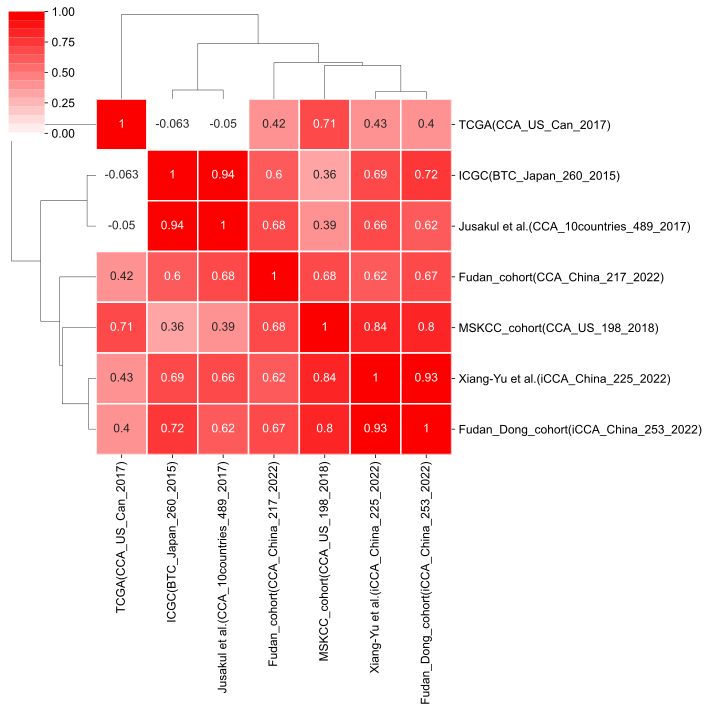

,Xiang-Yu et al.(iCCA_China_225_2022),TCGA(CCA_US_Can_2017),MSKCC_cohort(CCA_US_198_2018),ICGC(BTC_Japan_260_2015),Jusakul et al.(CCA_10countries_489_2017),Fudan_cohort(CCA_China_217_2022),Fudan_Dong_cohort(iCCA_China_253_2022)
Xiang-Yu et al.(iCCA_China_225_2022),1.000000,0.427250,0.843495,0.694969,0.663790,0.615864,0.931905
TCGA(CCA_US_Can_2017),0.427250,1.000000,0.707827,-0.063179,-0.049530,0.418849,0.402565
MSKCC_cohort(CCA_US_198_2018),0.843495,0.707827,1.000000,0.355339,0.394845,0.683723,0.799958
ICGC(BTC_Japan_260_2015),0.694969,-0.063179,0.355339,1.000000,0.944585,0.599535,0.722350
Jusakul et al.(CCA_10countries_489_2017),0.663790,-0.049530,0.394845,0.944585,1.000000,0.679980,0.624711
Fudan_cohort(CCA_China_217_2022),0.615864,0.418849,0.683723,0.599535,0.679980,1.000000,0.673290
Fudan_Dong_cohort(iCCA_China_253_2022),0.931905,0.402565,0.799958,0.722350,0.624711,0.673290,1.000000


In [29]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# define the colormap ['#1c3e9f', 'white', '#fc0000']EE1D24 2369AD fc0000
cmap = mcolors.LinearSegmentedColormap.from_list(
    "red_blue_gradient", ['white', '#fc0000'], N=15)

def correlation_heatmap(data, method = 'pearson', log_transformed = False, outpath = None):
    """ Correaltion heatmap and correlation matrix 
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    method -> str: pearson or spearman
    log_transformed -> bool: whether to use log10 transformed data
    
    Return:
    -----------
    Dataframe: Correaltion of experiments data
    
    """
    if log_transformed:
        data = np.log10(data)
    corr = data.corr(method = method)
    ## Platelet selection refernce: https://learnku.com/articles/39890
    sn.clustermap(corr, annot= True, cmap=cmap,linewidths=1.5, color='black')  ## optional cmap: RdYlGn; RdYlGn_r; YlGn; rocket_r; YlGnBu; YlGnBu_r; YlOrBr; YlOrBr_r; YlOrRd; YlOrRd_r; RdBu_r
    # sn.heatmap(corr, annot=True, cmap='vlag')  ## optional cmap: RdYlGn; RdYlGn_r; YlGn; rocket_r; YlGnBu; YlGnBu_r; YlOrBr; YlOrBr_r; YlOrRd; YlOrRd_r;
    if outpath:
        plt.savefig(outpath + "/correlation_heatmap4.pdf")
        corr.to_csv(outpath + "/correlation_matrix.csv")
    plt.show()
    return corr


# corr = QC1.corr(method ='pearson')
# sn.heatmap(corr, cmap="rocket_r", annot=True)
# QC_data_293T = pd.read_csv("/Users/ranpeng/Desktop/Desktop/项目文件/对外服务/罗俊一/results/QC_data.csv", index_col = 0)
outpath = "/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/figure_subpanels/Fig1"
correlation_heatmap(cohort_mutation_matrix, method = 'pearson', outpath = outpath)